<a href="https://colab.research.google.com/github/Elman295/CIFAR10/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the CNN for CIFAR10

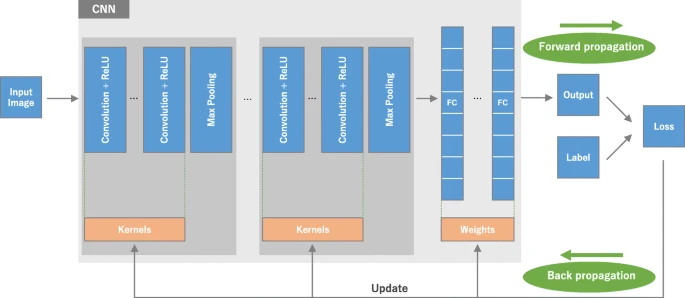

In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Load data

In [3]:
data = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = data.load_data()

print(x_train.shape)
print(y_train.shape)

170508288/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)


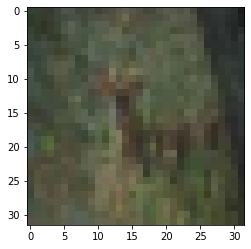

[4]


In [4]:
plt.imshow(x_train[10])
plt.show()
print(y_train[10])

Creating the model

In [11]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(60,(3,3), padding="same", input_shape= (32, 32, 3), activation="relu"),
    tf.keras.layers.Conv2D(60,(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(120,(3,3), padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(120, (3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 100, activation = "relu"),
    tf.keras.layers.Dense(units = 10 , activation = "softmax")
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 60)        1680      
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 60)        32460     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 60)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 60)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 120)       64920     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 120)       129720    
                                                      

Compiling the model

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
from tensorflow.python import metrics
model.compile(
    optimizer = "adam",
    loss = loss_fn,
    metrics= ["accuracy"]
)


In [17]:
history = model.fit(x_train, y_train, epochs = 15)


Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4941 - accuracy: 0.8318
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4927 - accuracy: 0.8332
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4681 - accuracy: 0.8432
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4912 - accuracy: 0.8347
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4718 - accuracy: 0.8399
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4613 - accuracy: 0.8466
Epoch 7/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4631 - accuracy: 0.8445
Epoch 8/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4554 - accuracy: 0.8454
Epoch 9/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4531 - accuracy: 0.8482
Epoch 10/15
1563/1563 [==============================] - 10s 7ms/step - l

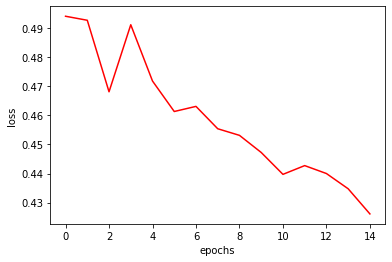

In [18]:
plt.plot(history.history["loss"], color = "red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

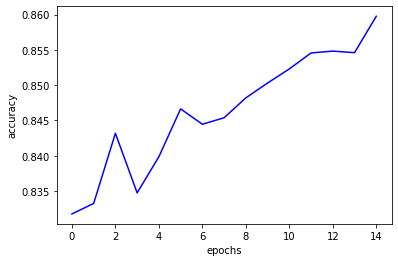

In [19]:
plt.plot(history.history["accuracy"], color = "blue")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [20]:
model.evaluate(x_test, y_test)

 25/313 [=>............................] - ETA: 1s - loss: 0.9719 - accuracy: 0.7613

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 2s 5ms/step - loss: 0.9992 - accuracy: 0.7395


[0.9991517663002014, 0.7394999861717224]

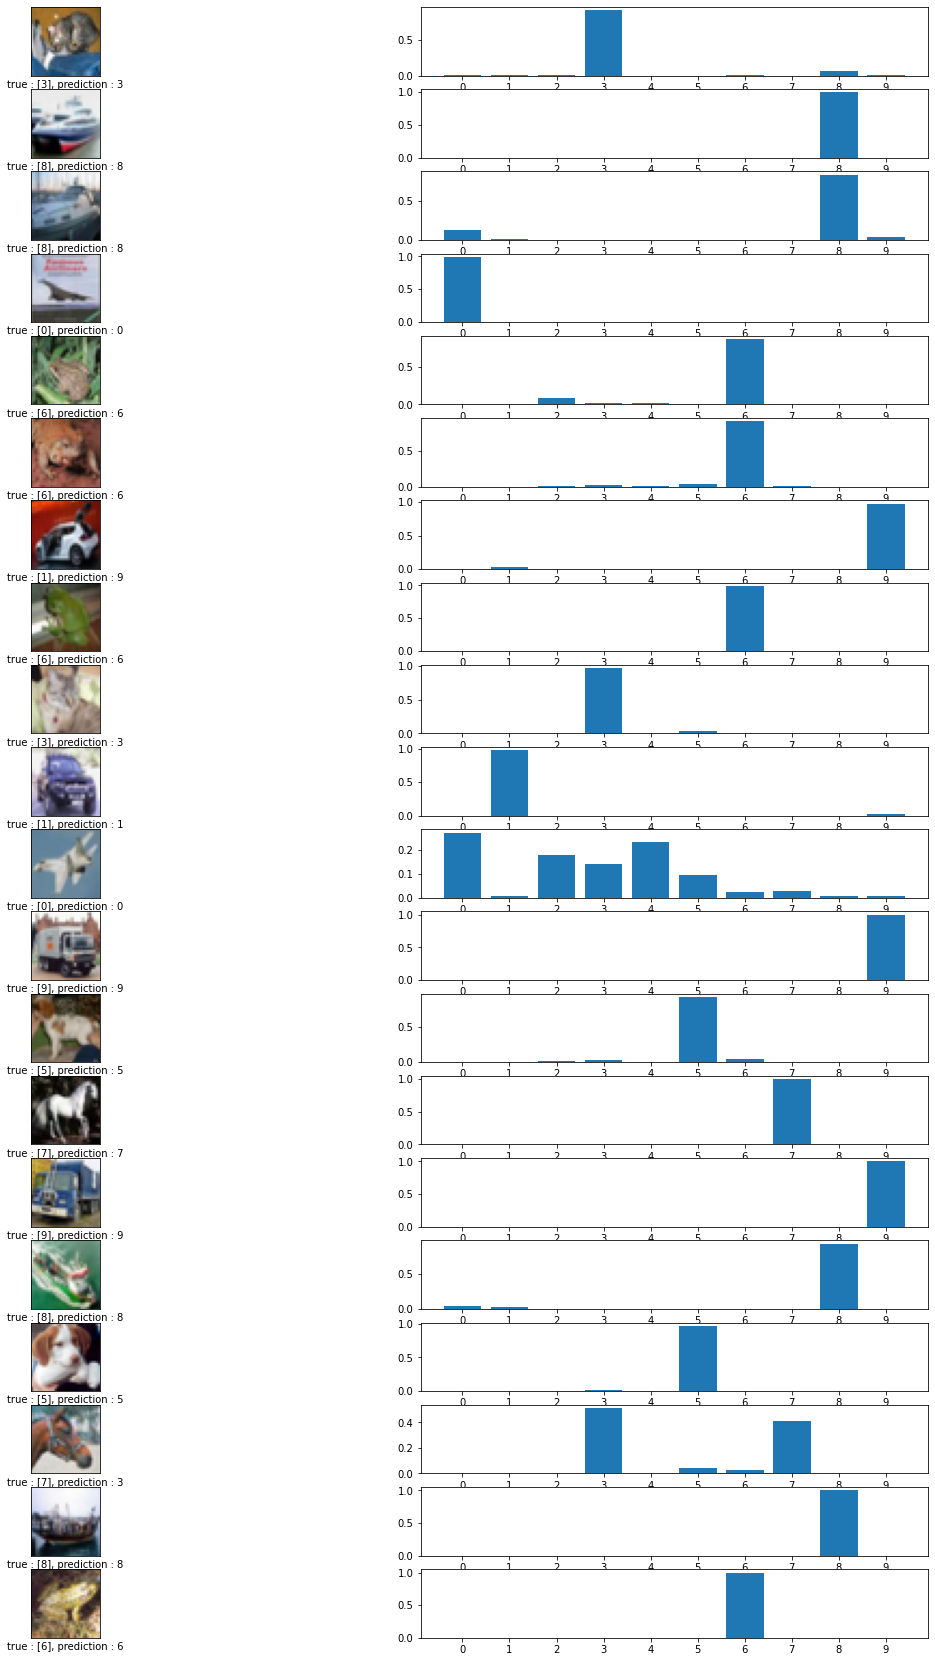

In [26]:
prediction = model(x_test)
plt.figure(figsize = (20,30))
for i in range(20):
  plt.subplot(20,2,2*i+1)
  plt.imshow(x_test[i])
  plt.xlabel(f"true : {y_test[i]}, prediction : {np.argmax(prediction[i])}")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.subplot(20,2,2*i+2)
  plt.bar(range(10),prediction[i])
  plt.xticks(range(10))

plt.show()

In [27]:
model.save("CNN.h5")